In [12]:
import pandas as pd
import numpy as np
import cvxopt as opt
from cvxopt import blas, solvers
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values[])

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

SyntaxError: invalid syntax (<ipython-input-61-101aaa071a5c>, line 36)

In [235]:
symbols = ['SPPI', 'GOOGL', 'AAPL', 'MSFT', 'F', 'AMZN', 'BTC-USD']
symbols2 = ['SPPI', 'GOOGL', 'AAPL', 'MSFT', 'F', 'AMZN']
symbols3 = ['SPPI', 'AAPL', 'MSFT', 'F']
symbols4 = ['SPPI', 'F']
start_date = '2020-11-20'
end_date = '2021-11-20'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
stock_data2 = web.get_data_yahoo(symbols2, start_date, end_date)
stock_data3 = web.get_data_yahoo(symbols3, start_date, end_date)
stock_data4 = web.get_data_yahoo(symbols4, start_date, end_date)
stock_data

Attributes Adj Close                                                  \
Symbols         SPPI        GOOGL        AAPL        MSFT          F   
Date                                                                   
2020-11-20      4.32  1736.380005  116.621048  208.641098   8.696213   
2020-11-21       NaN          NaN         NaN         NaN        NaN   
2020-11-22       NaN          NaN         NaN         NaN        NaN   
2020-11-23      4.36  1727.560059  113.152435  208.363434   8.815611   
2020-11-24      4.48  1763.900024  114.464355  212.082275   9.402656   
...              ...          ...         ...         ...        ...   
2021-11-17      1.92  2960.939941  153.490005  339.119995  19.859999   
2021-11-18      1.80  2996.770020  157.869995  341.269989  19.559999   
2021-11-19      1.78  2978.530029  160.550003  343.109985  19.389999   
2021-11-20       NaN          NaN         NaN         NaN        NaN   
2021-11-21       NaN          NaN         NaN         NaN        NaN   

Attributes                            Close                           ...  \
Symbols            AMZN       BTC-USD  SPPI        GOOGL        AAPL  ...   
Date                                                                  ...   
2020-11-20  3099.399902  18621.314453  4.32  1736.380005  117.339996  ...   
2020-11-21          NaN  18642.232422   NaN          NaN         NaN  ...   
2020-11-22          NaN  18370.001953   NaN          NaN         NaN  ...   
2020-11-23  3098.389893  18364.121094  4.36  1727.560059  113.849998  ...   
2020-11-24  3118.060059  19107.464844  4.48  1763.900024  115.169998  ...   
...                 ...           ...   ...          ...         ...  ...   
2021-11-17  3549.000000  60368.011719  1.92  2960.939941  153.490005  ...   
2021-11-18  3696.060059  56942.136719  1.80  2996.770020  157.869995  ...   
2021-11-19  3676.570068  58119.578125  1.78  2978.530029  160.550003  ...   
2021-11-20          NaN  59697.195312   NaN          NaN         NaN  ...   
2021-11-21          NaN  59524.484375   NaN          NaN         NaN  ...   

Attributes       Open                                Volume             \
Symbols             F         AMZN       BTC-USD       SPPI      GOOGL   
Date                                                                     
2020-11-20   8.810000  3117.020020  17817.083984  1140500.0  1384700.0   
2020-11-21        NaN          NaN  18621.316406        NaN        NaN   
2020-11-22        NaN          NaN  18642.232422        NaN        NaN   
2020-11-23   8.820000  3116.699951  18370.017578  1265100.0  1126500.0   
2020-11-24   9.150000  3100.500000  18365.015625  1395100.0  1399200.0   
...               ...          ...           ...        ...        ...   
2021-11-17  19.740000  3564.719971  60139.621094  1767100.0   979700.0   
2021-11-18  20.160000  3566.350098  60360.136719  2957300.0  1780400.0   
2021-11-19  19.639999  3712.689941  56896.128906  1856700.0  1684100.0   
2021-11-20        NaN          NaN  58115.082031        NaN        NaN   
2021-11-21        NaN          NaN  59689.230469        NaN        NaN   

Attributes                                                                 
Symbols            AAPL        MSFT            F       AMZN       BTC-USD  
Date                                                                       
2020-11-20   73604300.0  22843100.0   57024300.0  3374400.0  3.699287e+10  
2020-11-21          NaN         NaN          NaN        NaN  3.965021e+10  
2020-11-22          NaN         NaN          NaN        NaN  4.128043e+10  
2020-11-23  127959300.0  25683500.0   71537100.0  4708900.0  4.274111e+10  
2020-11-24  113874200.0  33979700.0   99520500.0  3602100.0  5.146957e+10  
...                 ...         ...          ...        ...           ...  
2021-11-17   88807000.0  19053400.0   80855200.0  2560300.0  3.917839e+10  
2021-11-18  137827700.0  22463500.0  111368800.0  5703500.0  4.138834e+10  
2021-11-19  117147500.0  21942200.0   6

In [219]:
stock_data['Adj Close']

Symbols,SPPI,GOOGL,AAPL,MSFT,F,AMZN,BTC-USD
Date,,,,,,,
2020-11-20,4.32,1736.380005,116.621048,208.641098,8.696213,3099.399902,18621.314453
2020-11-21,NaN,NaN,NaN,NaN,NaN,NaN,18642.232422
2020-11-22,NaN,NaN,NaN,NaN,NaN,NaN,18370.001953
2020-11-23,4.36,1727.560059,113.152443,208.363434,8.815611,3098.389893,18364.121094
2020-11-24,4.48,1763.900024,114.464355,212.082275,9.402656,3118.060059,19107.464844
...,...,...,...,...,...,...,...
2021-11-17,1.92,2960.939941,153.490005,339.119995,19.859999,3549.000000,60368.011719
2021-11-18,1.80,2996.770020,157.869995,341.269989,19.559999,3696.060059,56942.136719
2021-11-19,1.78,2978.530029,160.550003,343.109985,19.389999,3676.570068,58119.578125


In [220]:
selected = list(stock_data.columns[1:])
returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly['Adj Close'].mean()

In [221]:
cov_quarterly = returns_quarterly['Adj Close'].cov()
cov_quarterly

Symbols,GOOGL,AAPL,MSFT,F,AMZN,BTC-USD
Symbols,,,,,,
GOOGL,0.000157,0.000087,0.000091,0.000039,0.000087,0.000085
AAPL,0.000087,0.000169,0.000086,0.000031,0.000094,0.000064
MSFT,0.000091,0.000086,0.000107,0.000014,0.000073,0.000082
F,0.000039,0.000031,0.000014,0.000445,0.000031,0.000044
AMZN,0.000087,0.000094,0.000073,0.000031,0.000153,0.000038
BTC-USD,0.000085,0.000064,0.000082,0.000044,0.000038,0.001787


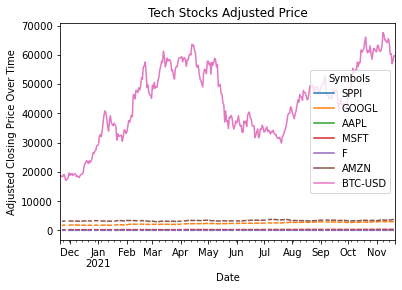

In [229]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Tech Stocks Adjusted Price')
plt.show()

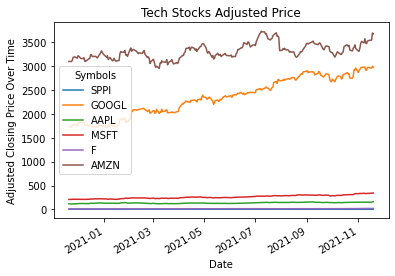

In [230]:
stock_data_closing_prices2 = stock_data2['Adj Close']
stock_data_closing_prices2.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Tech Stocks Adjusted Price')
plt.show()

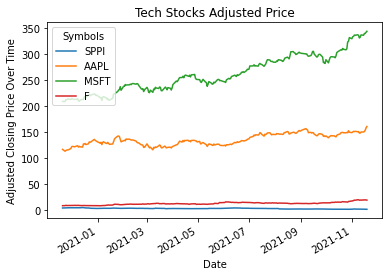

In [232]:
stock_data_closing_prices3 = stock_data3['Adj Close']
stock_data_closing_prices3.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Tech Stocks Adjusted Price')
plt.show()

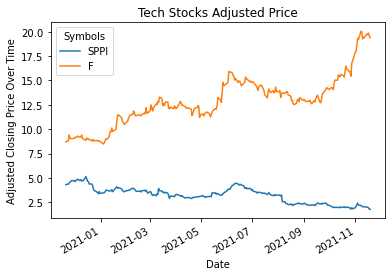

In [236]:
stock_data_closing_prices4 = stock_data4['Adj Close']
stock_data_closing_prices4.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Tech Stocks Adjusted Price')
plt.show()

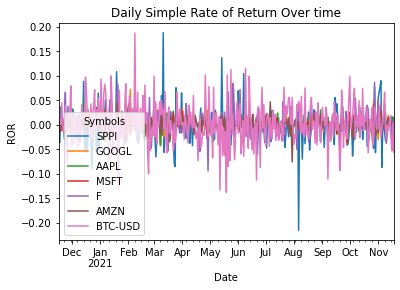

In [198]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.show()

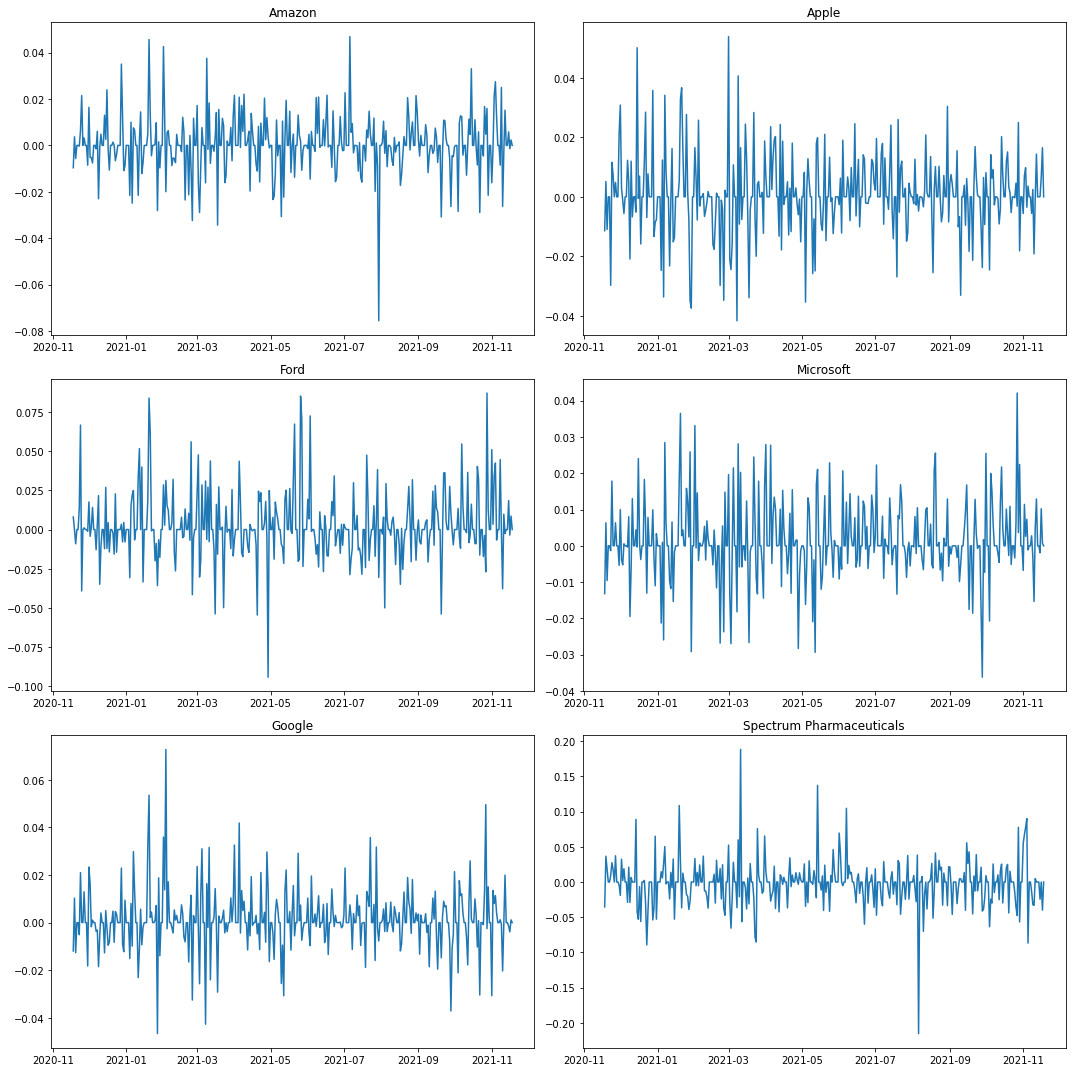

In [199]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['F'].pct_change())
ax3.set_title("Ford")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOGL'].pct_change())
ax5.set_title("Google")
ax6.plot(stock_data['Adj Close']['SPPI'].pct_change())
ax6.set_title('Spectrum Pharmaceuticals')
plt.tight_layout()
plt.show()

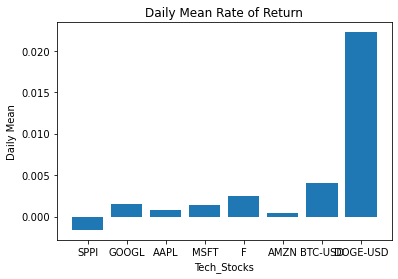

In [183]:
daily_mean = stock_data_daily_returns.mean()
daily_mean.keys()
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
x_pos = np.arange(len(daily_mean.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_mean.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("Daily Mean")
plt.title("Daily Mean Rate of Return")
plt.show()

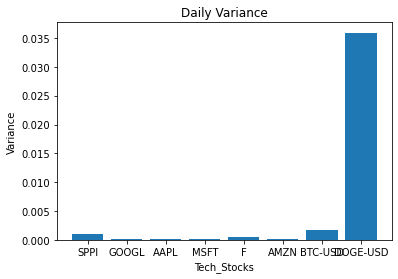

In [184]:
daily_var = stock_data_daily_returns.var()
daily_var.keys()
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
x_pos = np.arange(len(daily_var.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_var.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("Variance")
plt.title("Daily Variance")
plt.show()

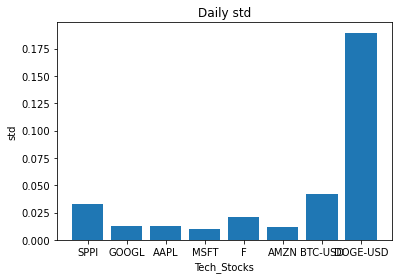

In [185]:
daily_std = stock_data_daily_returns.std()
daily_std.keys()
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
x_pos = np.arange(len(daily_std.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_std.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("Daily std")
plt.show()

In [123]:
stock_data_daily_returns.corr()

Symbols,SPPI,GOOGL,AAPL,MSFT,F,AMZN,BTC-USD
Symbols,,,,,,,
SPPI,1.000000,0.212893,0.168138,0.157454,0.218459,0.171824,0.098966
GOOGL,0.212893,1.000000,0.536372,0.706434,0.147885,0.563306,0.160946
AAPL,0.168138,0.536372,1.000000,0.640128,0.122186,0.579744,0.120951
MSFT,0.157454,0.706434,0.640128,1.000000,0.064064,0.578604,0.184882
F,0.218459,0.147885,0.122186,0.064064,1.000000,0.127592,0.046297
AMZN,0.171824,0.563306,0.579744,0.578604,0.127592,1.000000,0.086775
BTC-USD,0.098966,0.160946,0.120951,0.184882,0.046297,0.086775,1.000000


In [ ]:
#According to the internet

In [124]:
cov_matrix = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,SPPI,GOOGL,AAPL,MSFT,F,AMZN,BTC-USD
Symbols,,,,,,,
SPPI,0.001073,0.000085,0.000071,0.000052,0.000147,0.000067,0.000135
GOOGL,0.000085,0.000156,0.000087,0.000092,0.000038,0.000086,0.000086
AAPL,0.000071,0.000087,0.000167,0.000086,0.000033,0.000091,0.000065
MSFT,0.000052,0.000092,0.000086,0.000108,0.000014,0.000073,0.000081
F,0.000147,0.000038,0.000033,0.000014,0.000437,0.000033,0.000042
AMZN,0.000067,0.000086,0.000091,0.000073,0.000033,0.000149,0.000046
BTC-USD,0.000135,0.000086,0.000065,0.000081,0.000042,0.000046,0.001782


In [125]:
# Yearly returns for individual companies
ind_er = stock_data['Adj Close'].resample('Y').last().pct_change().mean()
ind_er

Symbols
SPPI      -0.436950
GOOGL      0.689417
AAPL       0.163888
MSFT       0.537463
F          1.270762
AMZN       0.089676
BTC-USD    0.963405
dtype: float64

In [126]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
SPPI       0.517898
GOOGL      0.197354
AAPL       0.204218
MSFT       0.164164
F          0.330576
AMZN       0.193165
BTC-USD    0.667393
dtype: float64

In [127]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
SPPI,-0.436950,0.517898
GOOGL,0.689417,0.197354
AAPL,0.163888,0.204218
MSFT,0.537463,0.164164
F,1.270762,0.330576
AMZN,0.089676,0.193165
BTC-USD,0.963405,0.667393


In [128]:
df = stock_data['Adj Close']
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and it's weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [129]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [130]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,SPPI weight,GOOGL weight,AAPL weight,MSFT weight,F weight,AMZN weight,BTC-USD weight
0,0.379690,0.210603,0.121921,0.096849,0.176584,0.195090,0.007864,0.188370,0.213322
1,0.593408,0.174692,0.084762,0.222793,0.091802,0.071261,0.240092,0.183468,0.105822
2,0.554666,0.228000,0.202727,0.087021,0.030781,0.163930,0.223616,0.086185,0.205739
3,0.480243,0.196506,0.054487,0.210998,0.221851,0.074859,0.061335,0.181569,0.194900
4,0.309881,0.226682,0.212445,0.035452,0.025048,0.181320,0.034523,0.297192,0.214020


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

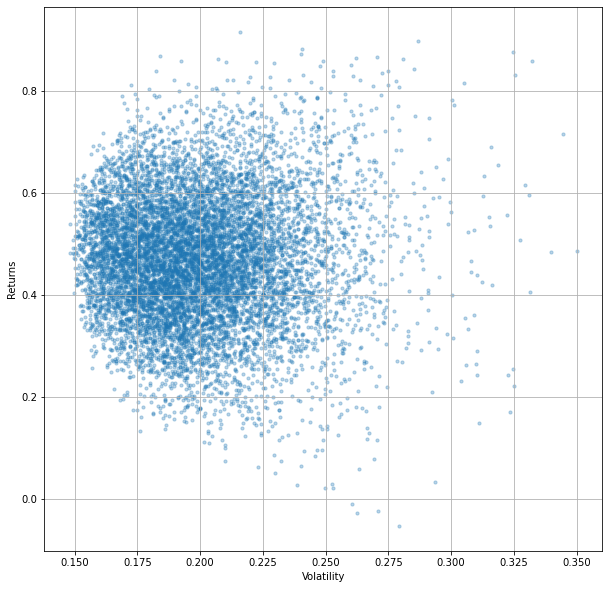

In [131]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [132]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.539780
Volatility        0.147975
SPPI weight       0.015589
GOOGL weight      0.134987
AAPL weight       0.122382
MSFT weight       0.297021
F weight          0.182266
AMZN weight       0.224865
BTC-USD weight    0.022890
Name: 4398, dtype: float64

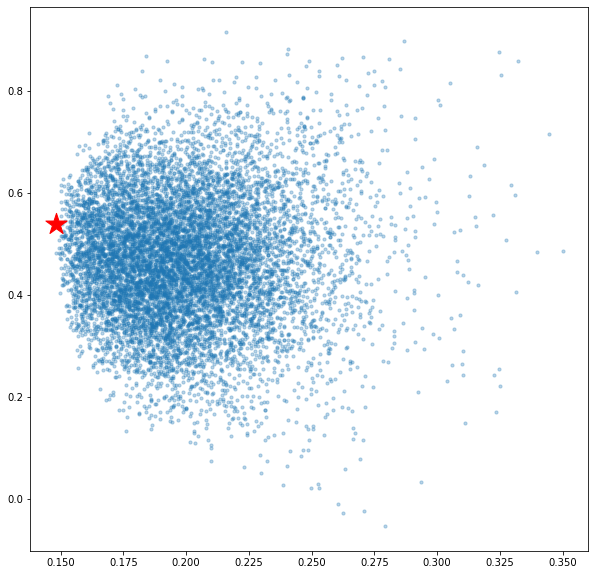

In [133]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [134]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.868602
Volatility        0.184010
SPPI weight       0.002359
GOOGL weight      0.291639
AAPL weight       0.079607
MSFT weight       0.112045
F weight          0.413815
AMZN weight       0.031373
BTC-USD weight    0.069163
Name: 2237, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

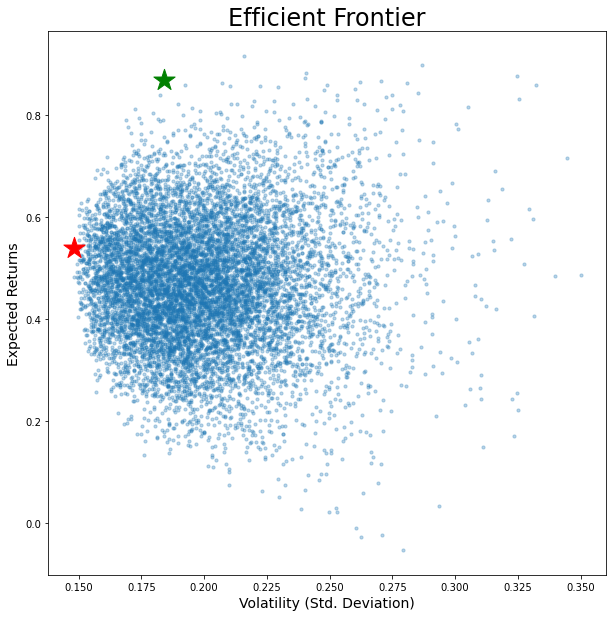

In [135]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

In [237]:
#Without BitCoin
symbols = ['GOOGL', 'AAPL', 'MSFT', 'F', 'AMZN', 'SPPI']
start_date = '2020-11-20'
end_date = '2021-11-20'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [238]:
cov_matrix = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).cov()

In [239]:
# Yearly returns for individual companies
ind_er = stock_data['Adj Close'].resample('Y').last().pct_change().mean()

In [240]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

In [241]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
GOOGL,0.699453,0.237092
AAPL,0.217422,0.247909
MSFT,0.555553,0.196782
F,1.217023,0.398757
AMZN,0.128845,0.236515
SPPI,-0.478006,0.625722


In [242]:
df = stock_data['Adj Close']
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and it's weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [243]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [244]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,GOOGL weight,AAPL weight,MSFT weight,F weight,AMZN weight,SPPI weight
0,0.256811,0.225212,0.198928,0.110712,0.291867,0.022256,0.138763,0.237474
1,0.402145,0.236325,0.222668,0.142985,0.046080,0.232620,0.126239,0.229408
2,0.277025,0.237887,0.092279,0.244332,0.041811,0.188436,0.187593,0.245549
3,0.554068,0.184286,0.272865,0.052291,0.253913,0.179801,0.176681,0.064449
4,0.343364,0.191048,0.242895,0.225683,0.106110,0.043845,0.320399,0.061068


In [245]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.569983
Volatility      0.175915
GOOGL weight    0.024421
AAPL weight     0.018021
MSFT weight     0.572767
F weight        0.186558
AMZN weight     0.162302
SPPI weight     0.035932
Name: 1356, dtype: float64

In [246]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.800608
Volatility      0.200350
GOOGL weight    0.227325
AAPL weight     0.002183
MSFT weight     0.359046
F weight        0.363457
AMZN weight     0.036687
SPPI weight     0.011301
Name: 4568, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

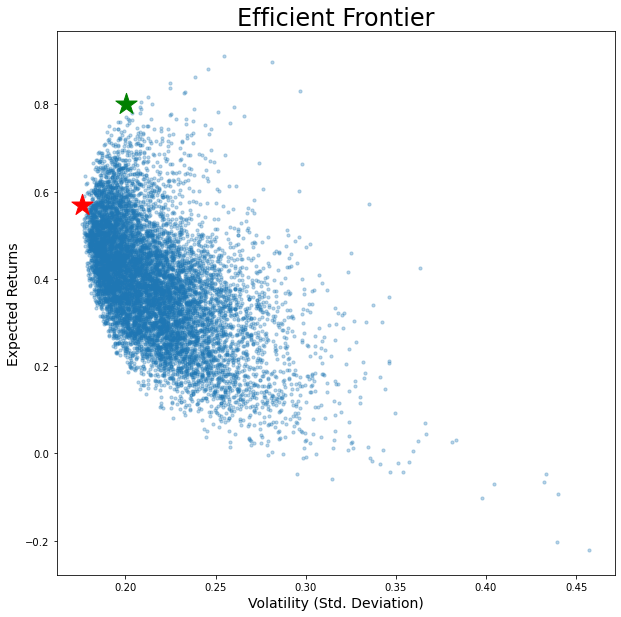

In [247]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

In [248]:
#Without SPPI
symbols = ['GOOGL', 'AAPL', 'MSFT', 'F', 'AMZN', 'BTC-USD']
start_date = '2020-11-20'
end_date = '2021-11-20'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [249]:
cov_matrix = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).cov()

# Yearly returns for individual companies
ind_er = stock_data['Adj Close'].resample('Y').last().pct_change().mean()

# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
GOOGL,0.699453,0.196854
AAPL,0.217422,0.205385
MSFT,0.555553,0.163508
F,1.217023,0.330848
AMZN,0.128845,0.195805
BTC-USD,1.054787,0.666963


In [250]:
df = stock_data['Adj Close']
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and it's weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [251]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [252]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,GOOGL weight,AAPL weight,MSFT weight,F weight,AMZN weight,BTC-USD weight
0,0.615635,0.232767,0.099984,0.113608,0.173298,0.074376,0.252762,0.285971
1,0.754230,0.230611,0.165973,0.091943,0.097987,0.206625,0.161127,0.276345
2,0.657430,0.216266,0.173934,0.070529,0.146104,0.117271,0.240382,0.251780
3,0.712962,0.255073,0.057043,0.021276,0.145193,0.168553,0.279283,0.328652
4,0.627941,0.192912,0.249645,0.175772,0.278738,0.043016,0.063477,0.189352


In [253]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.524478
Volatility        0.145966
GOOGL weight      0.093278
AAPL weight       0.090406
MSFT weight       0.403506
F weight          0.134141
AMZN weight       0.261118
BTC-USD weight    0.017552
Name: 5162, dtype: float64

In [254]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.794037
Volatility        0.160595
GOOGL weight      0.354893
AAPL weight       0.007151
MSFT weight       0.316996
F weight          0.254193
AMZN weight       0.012572
BTC-USD weight    0.054195
Name: 5619, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

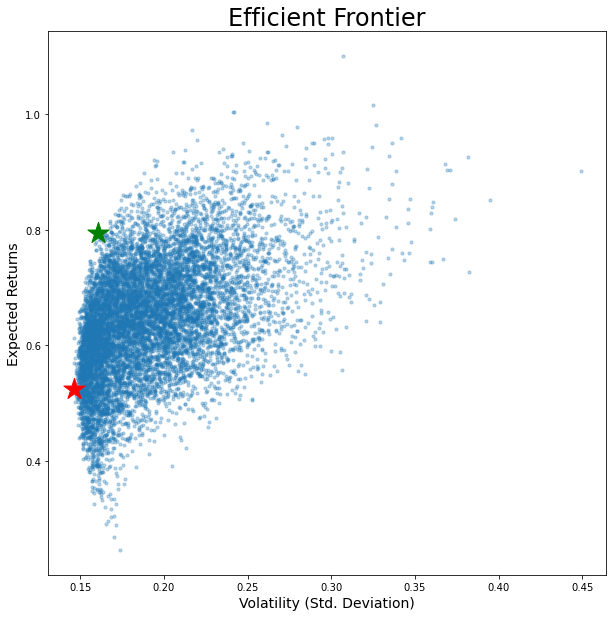

In [255]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

In [256]:
#Without SPPI & BitCoin
symbols = ['GOOGL', 'AAPL', 'MSFT', 'F', 'AMZN']
start_date = '2020-11-20'
end_date = '2021-11-20'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [257]:
cov_matrix = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).cov()

# Yearly returns for individual companies
ind_er = stock_data['Adj Close'].resample('Y').last().pct_change().mean()

# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
GOOGL,0.699453,0.237092
AAPL,0.217422,0.247909
MSFT,0.555553,0.196782
F,1.217023,0.398757
AMZN,0.128845,0.236515


In [258]:
df = stock_data['Adj Close']
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and it's weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [259]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [260]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,GOOGL weight,AAPL weight,MSFT weight,F weight,AMZN weight
0,0.493601,0.188510,0.251086,0.346429,0.307888,0.054605,0.039992
1,0.655082,0.208605,0.128162,0.122757,0.063334,0.381563,0.304185
2,0.513945,0.178301,0.180930,0.175819,0.307312,0.124202,0.211737
3,0.422247,0.185966,0.108240,0.084144,0.195852,0.129220,0.482544
4,0.551147,0.180550,0.148006,0.240479,0.253051,0.191668,0.166796


In [261]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.572378
Volatility      0.174777
GOOGL weight    0.090996
AAPL weight     0.089203
MSFT weight     0.528976
F weight        0.145188
AMZN weight     0.145636
Name: 4516, dtype: float64

In [262]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.841749
Volatility      0.205079
GOOGL weight    0.311526
AAPL weight     0.007714
MSFT weight     0.298367
F weight        0.374153
AMZN weight     0.008240
Name: 5, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

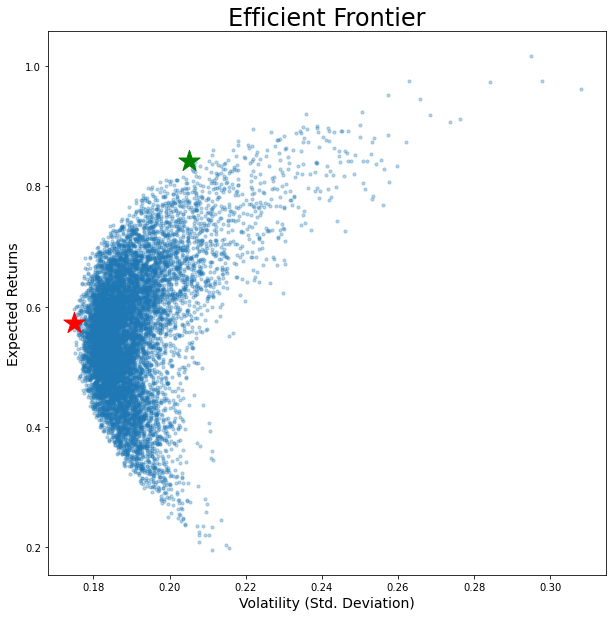

In [263]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

In [264]:
#Includes Doge
symbols = ['SPPI', 'GOOGL', 'AAPL', 'MSFT', 'F', 'AMZN', 'BTC-USD', 'DOGE-USD']
start_date = '2020-11-20'
end_date = '2021-11-20'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
cov_matrix = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).cov()

# Yearly returns for individual companies
ind_er = stock_data['Adj Close'].resample('Y').last().pct_change().mean()

# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
SPPI,-0.478006,0.518501
GOOGL,0.699453,0.196854
AAPL,0.217422,0.205385
MSFT,0.555553,0.163508
F,1.217023,0.330848
AMZN,0.128845,0.195805
BTC-USD,1.054787,0.666963
DOGE-USD,47.925521,2.053112


In [265]:
df = stock_data['Adj Close']
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and it's weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [266]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [267]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,SPPI weight,GOOGL weight,AAPL weight,MSFT weight,F weight,AMZN weight,BTC-USD weight,DOGE-USD weight
0,9.444297,0.462066,0.139944,0.188045,0.145325,0.018909,0.155776,0.017498,0.146904,0.187599
1,1.227113,0.230004,0.008852,0.135951,0.089237,0.100848,0.171751,0.219640,0.262312,0.011410
2,5.901009,0.297104,0.052005,0.193564,0.029270,0.095337,0.277386,0.165748,0.076273,0.110416
3,3.359619,0.291310,0.238604,0.062375,0.015452,0.225833,0.016371,0.166267,0.211739,0.063360
4,8.184823,0.418785,0.156926,0.118952,0.129934,0.061717,0.013843,0.205444,0.148039,0.165144


In [268]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns            0.657439
Volatility         0.151125
SPPI weight        0.043021
GOOGL weight       0.157008
AAPL weight        0.176683
MSFT weight        0.227171
F weight           0.200003
AMZN weight        0.178701
BTC-USD weight     0.014879
DOGE-USD weight    0.002534
Name: 2253, dtype: float64

In [269]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns            13.818029
Volatility          0.589930
SPPI weight         0.013335
GOOGL weight        0.083914
AAPL weight         0.177537
MSFT weight         0.152666
F weight            0.110628
AMZN weight         0.179684
BTC-USD weight      0.000892
DOGE-USD weight     0.281344
Name: 3589, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

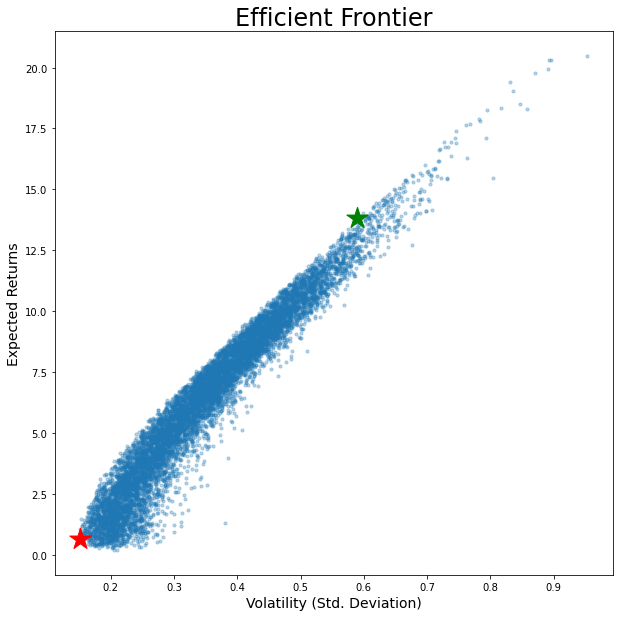

In [270]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

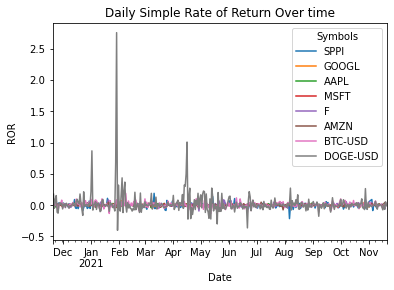

In [271]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.show()

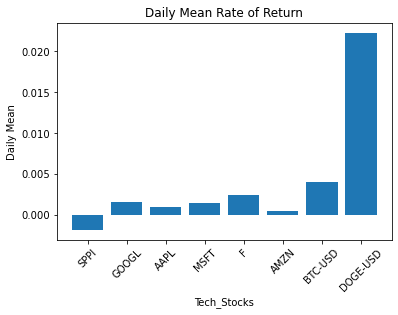

In [272]:
daily_mean = stock_data_daily_returns.mean()
daily_mean.keys()
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
x_pos = np.arange(len(daily_mean.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_mean.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("Daily Mean")
plt.title("Daily Mean Rate of Return")
plt.xticks(rotation = 45)
plt.show()

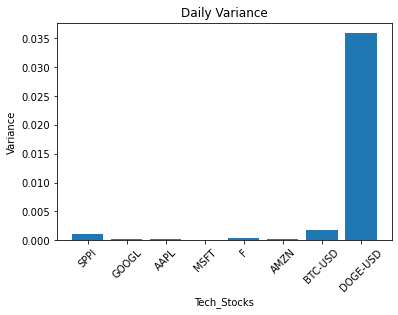

In [273]:
daily_var = stock_data_daily_returns.var()
daily_var.keys()
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
x_pos = np.arange(len(daily_var.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_var.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("Variance")
plt.title("Daily Variance")
plt.xticks(rotation=45)
plt.show()

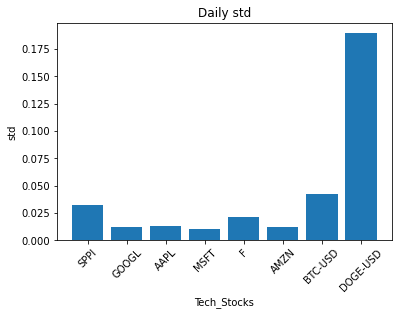

In [274]:
daily_std = stock_data_daily_returns.std()
daily_std.keys()
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
x_pos = np.arange(len(daily_std.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_std.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("Daily std")
plt.xticks(rotation=45)
plt.show()

In [275]:
stock_data_daily_returns.corr()

Symbols,SPPI,GOOGL,AAPL,MSFT,F,AMZN,BTC-USD,DOGE-USD
Symbols,,,,,,,,
SPPI,1.000000,0.206028,0.153020,0.151475,0.224774,0.150394,0.105143,0.036438
GOOGL,0.206028,1.000000,0.531241,0.703207,0.146432,0.560762,0.160355,0.018604
AAPL,0.153020,0.531241,1.000000,0.636384,0.114184,0.582397,0.115728,-0.101490
MSFT,0.151475,0.703207,0.636384,1.000000,0.062244,0.571665,0.186959,-0.048266
F,0.224774,0.146432,0.114184,0.062244,1.000000,0.118750,0.049760,0.013221
AMZN,0.150394,0.560762,0.582397,0.571665,0.118750,1.000000,0.073483,-0.005809
BTC-USD,0.105143,0.160355,0.115728,0.186959,0.049760,0.073483,1.000000,0.303490
DOGE-USD,0.036438,0.018604,-0.101490,-0.048266,0.013221,-0.005809,0.303490,1.000000


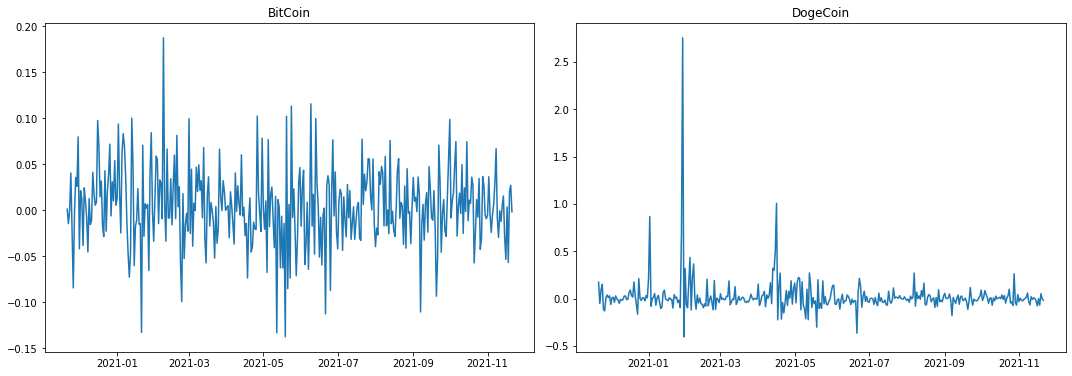

In [276]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax1.plot(stock_data['Adj Close']['BTC-USD'].pct_change())
ax1.set_title("BitCoin")
ax2.plot(stock_data['Adj Close']['DOGE-USD'].pct_change())
ax2.set_title("DogeCoin")
plt.tight_layout()
plt.show()